In [35]:
import warnings
warnings.simplefilter("ignore")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, roc_auc_score

# 1. Load data

In [40]:
df = pd.read_csv(r"dataset/propensity_to_buy.csv")

In [41]:
df.sample(5)

,Age,Income,Risk_Appetite,Preferred_Investment_Type,Credit_Score,Loan_History,Monthly_Savings,Annual_Expenses,Debt_to_Income_Ratio,Website_Visits,...,Referral_Usage,Geographic_Region,Equity_Fund,Debt_Fund,Hybrid_Fund,Tax_Saving_Fund,Liquid_Fund,Index_Fund,Sectoral_Thematic_Fund,customer_id
27585,46.806430,109973.085358,2.0,0.0,812.248276,4.545324,8997.664611,89992.934462,0.1,44.867205,...,0.000000,North,0,1,1,1,0,0,1,8106
1862,37.434093,30006.471976,2.0,2.0,630.075756,0.000000,2486.760092,35001.747993,0.1,4.183168,...,0.100129,Southwest,0,0,0,0,0,0,0,36708
4985,45.429367,79981.256957,2.0,0.0,685.097886,7.542960,4994.767429,59992.479632,0.1,31.644604,...,1.000000,West,0,0,0,0,0,0,0,98738
9502,58.153251,40002.229941,2.0,0.0,609.677583,6.012108,1991.040770,29999.259726,0.1,3.225477,...,1.000000,Central,1,1,0,1,0,0,0,73197
3034,38.461413,40000.345565,2.0,2.0,614.227742,10.000000,2010.248586,30003.904852,2.0,8.170746,...,1.000000,West,0,0,0,0,0,0,0,60359


In [42]:
df.shape

(49527, 23)

# 2. Check data quality

data type

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49527 entries, 0 to 49526
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        49527 non-null  float64
 1   Income                     49527 non-null  float64
 2   Risk_Appetite              49527 non-null  float64
 3   Preferred_Investment_Type  49527 non-null  float64
 4   Credit_Score               49527 non-null  float64
 5   Loan_History               49527 non-null  float64
 6   Monthly_Savings            49527 non-null  float64
 7   Annual_Expenses            49527 non-null  float64
 8   Debt_to_Income_Ratio       49527 non-null  float64
 9   Website_Visits             49527 non-null  float64
 10  Mutual_Fund_Pages_Visited  49527 non-null  float64
 11  Content_Viewed             49527 non-null  float64
 12  Promotional_Responses      49527 non-null  float64
 13  Referral_Usage             49527 non-null  flo

unique value

In [44]:
df.shape

(49527, 23)

In [45]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  Age
Unique value:  [47.29040534 18.         60.19467688 ... 32.24160655 48.87157693
 31.12846941]
Count unique value:  45211
----------
Columns name:  Income
Unique value:  [ 39988.6575797   50010.71572904 109995.30052376 ... 100004.81399928
  29989.30547604  89992.94909065]
Count unique value:  49527
----------
Columns name:  Risk_Appetite
Unique value:  [2.         0.84754457 0.         ... 1.81059197 1.67131154 1.57866063]
Count unique value:  3969
----------
Columns name:  Preferred_Investment_Type
Unique value:  [2.         1.38633193 1.3313568  ... 0.99212081 0.23836012 0.25908401]
Count unique value:  3886
----------
Columns name:  Credit_Score
Unique value:  [629.66314657 601.91526651 790.47781378 ... 758.00709792 641.41161695
 771.75962485]
Count unique value:  49527
----------
Columns name:  Loan_History
Unique value:  [7.5552213  4.84530973 0.         ... 4.80160313 0.84362864 4.62148803]
Count unique value:  18167
----------
Columns name:  Monthly_Savings
Uni

missing value

In [46]:
df.isna().sum()

Age                          0
Income                       0
Risk_Appetite                0
Preferred_Investment_Type    0
Credit_Score                 0
Loan_History                 0
Monthly_Savings              0
Annual_Expenses              0
Debt_to_Income_Ratio         0
Website_Visits               0
Mutual_Fund_Pages_Visited    0
Content_Viewed               0
Promotional_Responses        0
Referral_Usage               0
Geographic_Region            0
Equity_Fund                  0
Debt_Fund                    0
Hybrid_Fund                  0
Tax_Saving_Fund              0
Liquid_Fund                  0
Index_Fund                   0
Sectoral_Thematic_Fund       0
customer_id                  0
dtype: int64

basic EDA

In [47]:
df.describe()

,Age,Income,Risk_Appetite,Preferred_Investment_Type,Credit_Score,Loan_History,Monthly_Savings,Annual_Expenses,Debt_to_Income_Ratio,Website_Visits,...,Promotional_Responses,Referral_Usage,Equity_Fund,Debt_Fund,Hybrid_Fund,Tax_Saving_Fund,Liquid_Fund,Index_Fund,Sectoral_Thematic_Fund,customer_id
count,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,...,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000,49527.000000
mean,40.545412,71400.512448,1.007337,1.007212,695.477442,3.992315,5205.172342,57820.166523,1.024294,32.343967,...,4.351687,0.495144,0.501524,0.715529,0.661356,0.613181,0.299594,0.297131,0.147071,49892.227149
std,12.924852,29001.112812,0.972914,0.973732,75.321290,4.217927,2616.232516,21716.711915,0.925416,19.734859,...,4.284872,0.493644,0.500003,0.451167,0.473253,0.487027,0.458085,0.456999,0.354181,28849.494014
min,18.000000,29961.077611,0.000000,0.000000,565.351909,0.000000,1965.210750,29964.948207,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.675436,40006.826594,0.000000,0.000000,624.948196,0.000000,2506.410935,35006.414993,0.100000,16.347570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24914.000000
50%,40.379049,79999.720069,1.096034,1.095412,679.990647,2.325293,4999.600943,59999.550023,0.694940,30.535906,...,3.216969,0.366566,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,49908.000000
75%,50.209856,99993.491703,2.000000,2.000000,773.005526,9.120409,7993.049174,79993.288161,2.000000,47.709879,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,74877.500000
max,65.000000,110039.276658,2.000000,2.000000,839.740006,10.000000,9039.592985,90037.604982,2.000000,100.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000


# 3. Feature engineering

Geographic_Region

In [48]:
duckdb.query('select distinct Geographic_Region from df')

┌───────────────────┐
│ Geographic_Region │
│      varchar      │
├───────────────────┤
│ Northeast         │
│ Central           │
│ North             │
│ East              │
│ Midwest           │
│ Southwest         │
│ South             │
│ West              │
│ Southeast         │
└───────────────────┘

In [49]:
df = duckdb.query("""
select *
, case when Geographic_Region = 'Central' then 1 else 0 end loc_central
, case when Geographic_Region = 'North' then 1 else 0 end loc_north
, case when Geographic_Region = 'East' then 1 else 0 end loc_east
, case when Geographic_Region = 'Midwest' then 1 else 0 end loc_midwest
, case when Geographic_Region = 'Southeast' then 1 else 0 end loc_southeast
, case when Geographic_Region = 'South' then 1 else 0 end loc_south
, case when Geographic_Region = 'West' then 1 else 0 end loc_west
, case when Geographic_Region = 'Southwest' then 1 else 0 end loc_southwest
, case when Geographic_Region = 'Northeast' then 1 else 0 end loc_northwest
from df
""").to_df()

check na

In [50]:
df.isna().sum()

Age                          0
Income                       0
Risk_Appetite                0
Preferred_Investment_Type    0
Credit_Score                 0
Loan_History                 0
Monthly_Savings              0
Annual_Expenses              0
Debt_to_Income_Ratio         0
Website_Visits               0
Mutual_Fund_Pages_Visited    0
Content_Viewed               0
Promotional_Responses        0
Referral_Usage               0
Geographic_Region            0
Equity_Fund                  0
Debt_Fund                    0
Hybrid_Fund                  0
Tax_Saving_Fund              0
Liquid_Fund                  0
Index_Fund                   0
Sectoral_Thematic_Fund       0
customer_id                  0
loc_central                  0
loc_north                    0
loc_east                     0
loc_midwest                  0
loc_southeast                0
loc_south                    0
loc_west                     0
loc_southwest                0
loc_northwest                0
dtype: i

In [51]:
df.fillna(0, inplace=True)

drop unnecessary columns

In [52]:
df.drop(columns = ['customer_id','Geographic_Region'], inplace = True)

correlation

In [53]:
corr = df.corr()

<Axes: >

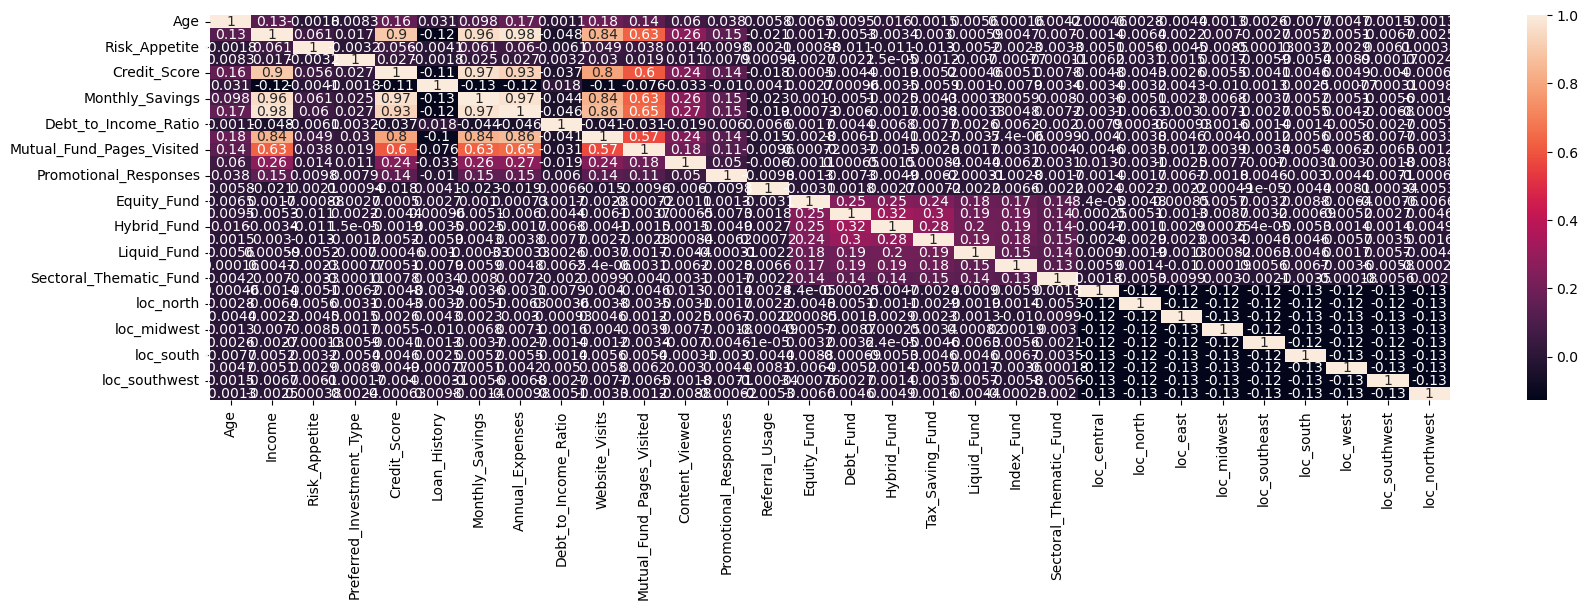

In [54]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [55]:
corr_abs_table_eq = corr['Equity_Fund'].abs().sort_values(ascending=False)
corr_abs_table_eq

Equity_Fund                  1.000000
Debt_Fund                    0.253751
Hybrid_Fund                  0.247249
Tax_Saving_Fund              0.236744
Liquid_Fund                  0.179606
Index_Fund                   0.170417
Sectoral_Thematic_Fund       0.142395
loc_south                    0.008850
loc_northwest                0.006616
Age                          0.006458
loc_west                     0.006405
loc_midwest                  0.005736
loc_north                    0.004822
loc_southeast                0.003162
Referral_Usage               0.003057
Website_Visits               0.002791
Preferred_Investment_Type    0.002741
Loan_History                 0.002688
Debt_to_Income_Ratio         0.001710
Income                       0.001663
Promotional_Responses        0.001291
Content_Viewed               0.001087
Monthly_Savings              0.001042
Risk_Appetite                0.000880
loc_east                     0.000846
loc_southwest                0.000762
Annual_Expen

In [56]:
corr_abs_table_equity = corr['Equity_Fund'].abs().sort_values(ascending=False)
corr_abs_table_equity

Equity_Fund                  1.000000
Debt_Fund                    0.253751
Hybrid_Fund                  0.247249
Tax_Saving_Fund              0.236744
Liquid_Fund                  0.179606
Index_Fund                   0.170417
Sectoral_Thematic_Fund       0.142395
loc_south                    0.008850
loc_northwest                0.006616
Age                          0.006458
loc_west                     0.006405
loc_midwest                  0.005736
loc_north                    0.004822
loc_southeast                0.003162
Referral_Usage               0.003057
Website_Visits               0.002791
Preferred_Investment_Type    0.002741
Loan_History                 0.002688
Debt_to_Income_Ratio         0.001710
Income                       0.001663
Promotional_Responses        0.001291
Content_Viewed               0.001087
Monthly_Savings              0.001042
Risk_Appetite                0.000880
loc_east                     0.000846
loc_southwest                0.000762
Annual_Expen

In [57]:
corr_abs_table_debt = corr['Debt_Fund'].abs().sort_values(ascending=False)
corr_abs_table_debt

Debt_Fund                    1.000000
Hybrid_Fund                  0.322457
Tax_Saving_Fund              0.303161
Equity_Fund                  0.253751
Liquid_Fund                  0.193537
Index_Fund                   0.193242
Sectoral_Thematic_Fund       0.143175
Risk_Appetite                0.011112
Age                          0.009484
loc_midwest                  0.008687
Promotional_Responses        0.007337
Website_Visits               0.006149
Annual_Expenses              0.005958
Income                       0.005259
loc_west                     0.005181
loc_north                    0.005101
Monthly_Savings              0.005100
loc_northwest                0.004635
Debt_to_Income_Ratio         0.004447
Credit_Score                 0.004436
Mutual_Fund_Pages_Visited    0.003740
loc_southeast                0.003176
loc_southwest                0.002734
Preferred_Investment_Type    0.002232
Referral_Usage               0.001841
loc_east                     0.001321
Loan_History

In [58]:
corr_abs_table_hybrid = corr['Hybrid_Fund'].abs().sort_values(ascending=False)
corr_abs_table_hybrid

Hybrid_Fund                  1.000000
Debt_Fund                    0.322457
Tax_Saving_Fund              0.282807
Equity_Fund                  0.247249
Liquid_Fund                  0.196502
Index_Fund                   0.187323
Sectoral_Thematic_Fund       0.143311
Age                          0.015613
Risk_Appetite                0.010671
Debt_to_Income_Ratio         0.006846
loc_south                    0.005271
Promotional_Responses        0.004931
loc_northwest                0.004926
loc_central                  0.004706
Website_Visits               0.004117
Loan_History                 0.003500
Income                       0.003355
loc_east                     0.002934
Referral_Usage               0.002697
Monthly_Savings              0.002513
Credit_Score                 0.001926
Annual_Expenses              0.001657
Mutual_Fund_Pages_Visited    0.001539
Content_Viewed               0.001523
loc_west                     0.001444
loc_southwest                0.001411
loc_north   

In [59]:
corr_abs_table_tsv = corr['Tax_Saving_Fund'].abs().sort_values(ascending=False)
corr_abs_table_tsv

Tax_Saving_Fund              1.000000
Debt_Fund                    0.303161
Hybrid_Fund                  0.282807
Equity_Fund                  0.236744
Liquid_Fund                  0.194369
Index_Fund                   0.183020
Sectoral_Thematic_Fund       0.146154
Risk_Appetite                0.013382
Debt_to_Income_Ratio         0.007736
Promotional_Responses        0.006156
Loan_History                 0.005922
loc_west                     0.005713
Credit_Score                 0.005165
loc_south                    0.004581
loc_southeast                0.004572
Monthly_Savings              0.004268
Annual_Expenses              0.003753
loc_southwest                0.003468
loc_midwest                  0.003396
Income                       0.003029
loc_north                    0.002862
Mutual_Fund_Pages_Visited    0.002769
Website_Visits               0.002665
loc_central                  0.002350
loc_east                     0.002302
loc_northwest                0.001636
Age         

In [60]:
corr_abs_table_liquid = corr['Liquid_Fund'].abs().sort_values(ascending=False)
corr_abs_table_liquid

Liquid_Fund                  1.000000
Hybrid_Fund                  0.196502
Tax_Saving_Fund              0.194369
Debt_Fund                    0.193537
Equity_Fund                  0.179606
Index_Fund                   0.151444
Sectoral_Thematic_Fund       0.137985
Preferred_Investment_Type    0.007026
loc_southeast                0.006260
loc_southwest                0.005726
Age                          0.005550
Risk_Appetite                0.005196
loc_south                    0.004636
Content_Viewed               0.004388
loc_northwest                0.004377
Website_Visits               0.003674
Debt_to_Income_Ratio         0.002563
Referral_Usage               0.002249
loc_north                    0.001894
Mutual_Fund_Pages_Visited    0.001738
loc_west                     0.001672
loc_east                     0.001283
Loan_History                 0.001042
loc_central                  0.000903
loc_midwest                  0.000818
Income                       0.000593
Credit_Score

In [61]:
corr_abs_table_index = corr['Index_Fund'].abs().sort_values(ascending=False)
corr_abs_table_index

Index_Fund                   1.000000
Debt_Fund                    0.193242
Hybrid_Fund                  0.187323
Tax_Saving_Fund              0.183020
Equity_Fund                  0.170417
Liquid_Fund                  0.151444
Sectoral_Thematic_Fund       0.126580
loc_east                     0.010050
Loan_History                 0.007915
loc_south                    0.006700
Referral_Usage               0.006567
Debt_to_Income_Ratio         0.006235
Content_Viewed               0.006168
loc_central                  0.005905
Monthly_Savings              0.005895
loc_southwest                0.005803
loc_southeast                0.005558
Credit_Score                 0.005050
Annual_Expenses              0.004767
Income                       0.004695
loc_west                     0.003574
Mutual_Fund_Pages_Visited    0.003069
Promotional_Responses        0.002806
Risk_Appetite                0.002270
loc_north                    0.001406
Preferred_Investment_Type    0.000770
loc_northwes

In [62]:
corr_abs_table_theme = corr['Sectoral_Thematic_Fund'].abs().sort_values(ascending=False)
corr_abs_table_theme

Sectoral_Thematic_Fund       1.000000
Tax_Saving_Fund              0.146154
Hybrid_Fund                  0.143311
Debt_Fund                    0.143175
Equity_Fund                  0.142395
Liquid_Fund                  0.137985
Index_Fund                   0.126580
Website_Visits               0.009915
loc_east                     0.009867
Monthly_Savings              0.008024
Credit_Score                 0.007824
Annual_Expenses              0.007210
Income                       0.006997
loc_southwest                0.005592
loc_north                    0.005290
Age                          0.004185
Mutual_Fund_Pages_Visited    0.004005
loc_south                    0.003498
Loan_History                 0.003435
Risk_Appetite                0.003296
Content_Viewed               0.003053
loc_midwest                  0.002976
Referral_Usage               0.002163
loc_southeast                0.002101
loc_northwest                0.001995
Debt_to_Income_Ratio         0.001960
loc_central 

# 4. Model

In [63]:
df.columns

Index(['Age', 'Income', 'Risk_Appetite', 'Preferred_Investment_Type',
       'Credit_Score', 'Loan_History', 'Monthly_Savings', 'Annual_Expenses',
       'Debt_to_Income_Ratio', 'Website_Visits', 'Mutual_Fund_Pages_Visited',
       'Content_Viewed', 'Promotional_Responses', 'Referral_Usage',
       'Equity_Fund', 'Debt_Fund', 'Hybrid_Fund', 'Tax_Saving_Fund',
       'Liquid_Fund', 'Index_Fund', 'Sectoral_Thematic_Fund', 'loc_central',
       'loc_north', 'loc_east', 'loc_midwest', 'loc_southeast', 'loc_south',
       'loc_west', 'loc_southwest', 'loc_northwest'],
      dtype='object')

train test split

In [64]:
df_equity = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                         , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                         , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                         , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                         , loc_west, loc_southwest, loc_northwest
                         , Equity_Fund
                         from df
                         """).to_df()

In [65]:
train_df_equity, temp_df_equity = train_test_split(df_equity, test_size=0.4, random_state=42)
val_df_equity, test_df_equity = train_test_split(temp_df_equity, test_size=0.5, random_state=42)

X_train_equity = train_df_equity.drop(columns=['Equity_Fund'])
y_train_equity = train_df_equity['Equity_Fund']
X_val_equity = val_df_equity.drop(columns=['Equity_Fund'])
y_val_equity = val_df_equity['Equity_Fund']
X_test_equity = test_df_equity.drop(columns=['Equity_Fund'])
y_test_equity = test_df_equity['Equity_Fund']

In [66]:
df_debt = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                          , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                          , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                          , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                          , loc_west, loc_southwest, loc_northwest
                          , Debt_Fund
                          from df
                          """).to_df()

In [67]:
train_df_debt, temp_df_debt = train_test_split(df_debt, test_size=0.4, random_state=42)
val_df_debt, test_df_debt = train_test_split(temp_df_debt, test_size=0.5, random_state=42)

X_train_debt = train_df_debt.drop(columns=['Debt_Fund'])
y_train_debt = train_df_debt['Debt_Fund']
X_val_debt = val_df_debt.drop(columns=['Debt_Fund'])
y_val_debt = val_df_debt['Debt_Fund']
X_test_debt = test_df_debt.drop(columns=['Debt_Fund'])
y_test_debt = test_df_debt['Debt_Fund']

In [68]:
df_hybrid = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                         , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                         , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                         , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                         , loc_west, loc_southwest, loc_northwest
                         , Hybrid_Fund
                         from df
                         """).to_df()

In [69]:
train_df_hybrid, temp_df_hybrid = train_test_split(df_hybrid, test_size=0.4, random_state=42)
val_df_hybrid, test_df_hybrid = train_test_split(temp_df_hybrid, test_size=0.5, random_state=42)

X_train_hybrid = train_df_hybrid.drop(columns=['Hybrid_Fund'])
y_train_hybrid = train_df_hybrid['Hybrid_Fund']
X_val_hybrid = val_df_hybrid.drop(columns=['Hybrid_Fund'])
y_val_hybrid = val_df_hybrid['Hybrid_Fund']
X_test_hybrid = test_df_hybrid.drop(columns=['Hybrid_Fund'])
y_test_hybrid = test_df_hybrid['Hybrid_Fund']

In [72]:
df_tsv = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                         , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                         , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                         , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                         , loc_west, loc_southwest, loc_northwest
                         , Tax_Saving_Fund
                         from df
                         """).to_df()

In [73]:
train_df_tsv, temp_df_tsv = train_test_split(df_tsv, test_size=0.4, random_state=42)
val_df_tsv, test_df_tsv = train_test_split(temp_df_tsv, test_size=0.5, random_state=42)

X_train_tsv = train_df_tsv.drop(columns=['Tax_Saving_Fund'])
y_train_tsv = train_df_tsv['Tax_Saving_Fund']
X_val_tsv = val_df_tsv.drop(columns=['Tax_Saving_Fund'])
y_val_tsv = val_df_tsv['Tax_Saving_Fund']
X_test_tsv = test_df_tsv.drop(columns=['Tax_Saving_Fund'])
y_test_tsv = test_df_tsv['Tax_Saving_Fund']

In [74]:
df_liquid = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                         , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                         , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                         , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                         , loc_west, loc_southwest, loc_northwest
                         , Liquid_Fund
                         from df
                         """).to_df()

In [75]:
train_df_liquid, temp_df_liquid = train_test_split(df_liquid, test_size=0.4, random_state=42)
val_df_liquid, test_df_liquid = train_test_split(temp_df_liquid, test_size=0.5, random_state=42)

X_train_liquid = train_df_liquid.drop(columns=['Liquid_Fund'])
y_train_liquid = train_df_liquid['Liquid_Fund']
X_val_liquid = val_df_liquid.drop(columns=['Liquid_Fund'])
y_val_liquid = val_df_liquid['Liquid_Fund']
X_test_liquid = test_df_liquid.drop(columns=['Liquid_Fund'])
y_test_liquid = test_df_liquid['Liquid_Fund']

In [76]:
df_index = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                           , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                           , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                           , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                           , loc_west, loc_southwest, loc_northwest
                           , Index_Fund
                           from df
                           """).to_df()

In [77]:
train_df_index, temp_df_index = train_test_split(df_index, test_size=0.4, random_state=42)
val_df_index, test_df_index = train_test_split(temp_df_index, test_size=0.5, random_state=42)

X_train_index = train_df_index.drop(columns=['Index_Fund'])
y_train_index = train_df_index['Index_Fund']
X_val_index = val_df_index.drop(columns=['Index_Fund'])
y_val_index = val_df_index['Index_Fund']
X_test_index = test_df_index.drop(columns=['Index_Fund'])
y_test_index = test_df_index['Index_Fund']

In [78]:
df_theme = duckdb.query("""select Age, Income, Risk_Appetite, Preferred_Investment_Type, Credit_Score
                           , Loan_History, Monthly_Savings, Annual_Expenses, Debt_to_Income_Ratio
                           , Website_Visits, Mutual_Fund_Pages_Visited, Content_Viewed, Promotional_Responses
                           , Referral_Usage, loc_central, loc_north, loc_east, loc_midwest, loc_southeast, loc_south
                           , loc_west, loc_southwest, loc_northwest
                           , Sectoral_Thematic_Fund
                           from df
                           """).to_df()

In [79]:
train_df_theme, temp_df_theme = train_test_split(df_theme, test_size=0.4, random_state=42)
val_df_theme, test_df_theme = train_test_split(temp_df_theme, test_size=0.5, random_state=42)

X_train_theme = train_df_theme.drop(columns=['Sectoral_Thematic_Fund'])
y_train_theme = train_df_theme['Sectoral_Thematic_Fund']
X_val_theme = val_df_theme.drop(columns=['Sectoral_Thematic_Fund'])
y_val_theme = val_df_theme['Sectoral_Thematic_Fund']
X_test_theme = test_df_theme.drop(columns=['Sectoral_Thematic_Fund'])
y_test_theme = test_df_theme['Sectoral_Thematic_Fund']

1. predicts only 1

In [ ]:
dummy_all_equity = DummyClassifier(strategy='constant', constant=1)
dummy_all_debt = DummyClassifier(strategy='constant', constant=1)
dummy_all_hybrid = DummyClassifier(strategy='constant', constant=1)
dummy_all_tsv = DummyClassifier(strategy='constant', constant=1)
dummy_all_liquid = DummyClassifier(strategy='constant', constant=1)
dummy_all_index = DummyClassifier(strategy='constant', constant=1)
dummy_all_theme = DummyClassifier(strategy='constant', constant=1)

In [ ]:
dummy_all_equity.fit(X_train_equity, y_train_equity)
dummy_all_debt.fit(X_train_debt, y_train_debt)
dummy_all_hybrid.fit(X_train_hybrid, y_train_hybrid)
dummy_all_tsv.fit(X_train_tsv, y_train_tsv)
dummy_all_liquid.fit(X_train_liquid, y_train_liquid)
dummy_all_theme.fit(X_train_theme, y_train_theme)

2. predicts only 0

In [ ]:
dummy_all_not_equity = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_debt = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_hybrid = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_tsv = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_liquid = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_index = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_theme = DummyClassifier(strategy='constant', constant=0)

In [ ]:
dummy_all_not_equity.fit(X_train_equity, y_train_equity)
dummy_all_not_debt.fit(X_train_debt, y_train_debt)
dummy_all_not_hybrid.fit(X_train_hybrid, y_train_hybrid)
dummy_all_not_tsv.fit(X_train_tsv, y_train_tsv)
dummy_all_not_liquid.fit(X_train_liquid, y_train_liquid) 
dummy_all_not_index.fit(X_train_index, y_train_index)
dummy_all_not_theme.fit(X_train_theme, y_train_theme)

DummyClassifier(constant=0, strategy='constant')